# Block Groups in Buffalo that are prone to Gentrification

below are all the shape files of every block in Erie county

In [1]:
%matplotlib inline

import pandas as pd
import geopandas
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import pysal.esda.mapclassify as ps
from pysal.esda.mapclassify import User_Defined


block_grp = geopandas.read_file("2018NYblockgrpSF/tl_2018_36_bg.shp")
block_grp = block_grp.rename(columns={'TRACTCE': 'Tract', 'BLKGRPCE': 'Block'})
erie_county_blockGrp = block_grp[(block_grp.COUNTYFP == "029")]
erie_county_blockGrp.head()
                                   

C:\Users\Voltaire Vergara\Anaconda3\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)
C:\Users\Voltaire Vergara\Anaconda3\lib\site-packages\numba\decorators.py:29: NumbaDeprecationWarning: autojit is deprecated, use jit instead, which provides the same functionality. For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-numba-autojit
  warnings.warn(NumbaDeprecationWarning(msg))


,STATEFP,COUNTYFP,Tract,Block,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
11,36,029,014603,2,360290146032,Block Group 2,G5030,S,1992416,0,+42.9837512,-078.6869747,"POLYGON ((-78.69695 42.989289, -78.69562499999..."
12,36,029,014601,2,360290146012,Block Group 2,G5030,S,2237921,0,+42.9608352,-078.6827714,"POLYGON ((-78.69694799999999 42.959301, -78.69..."
13,36,029,014601,4,360290146014,Block Group 4,G5030,S,2362636,0,+42.9716503,-078.6869950,POLYGON ((-78.69692999999999 42.97631699999999...
14,36,029,014601,3,360290146013,Block Group 3,G5030,S,1790691,0,+42.9714220,-078.6691991,"POLYGON ((-78.67719199999999 42.96713, -78.677..."
15,36,029,014603,3,360290146033,Block Group 3,G5030,S,2185747,0,+42.9806768,-078.6542591,"POLYGON ((-78.66214099999999 42.976565, -78.66..."


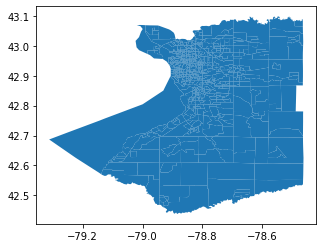

In [2]:
erie_county_blockGrp.plot() #THIS IS ERIE COUNTY PICTURE 

## Gentrification Blocks 
Below are the blocks that are indicated on the reading that are going through the process of gentrification. 

#### Lower West Side Neighborhood 
    eight census block groups located in parts of three census tracts (69.02 BG2, 69.02 BG4, 71.01 BG1, 71.02 BG2, 71.01 BG3, 71.01 BG4, 71.02 BG2, and 71.02 BG3).
#### Elicott Neighborhoood 
    three census block group located in one census tract. (14.02 BG1, 14.02 BG2 and 14.02 BG4). 
   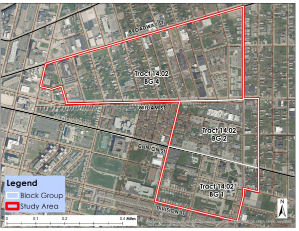
   
#### Fruit Belt Neighborhood 
    The Fruit Belt neighborhood is composed of four census block groups located in one census tract (31 BG1, 31 BG2, 31 BG3 and 31 BG4).
    

In [3]:
elicott = erie_county_blockGrp[(erie_county_blockGrp.Tract == "001402") & (erie_county_blockGrp.Block != "3")]
elicott

,STATEFP,COUNTYFP,Tract,Block,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
2319,36,029,001402,4,360290014024,Block Group 4,G5030,S,403167,0,+42.8867792,-078.8596790,"POLYGON ((-78.867634 42.886182, -78.8674389999..."
10454,36,029,001402,2,360290014022,Block Group 2,G5030,S,150487,0,+42.8835885,-078.8555911,"POLYGON ((-78.858862 42.883224, -78.858598 42...."
10514,36,029,001402,1,360290014021,Block Group 1,G5030,S,157335,0,+42.8808753,-078.8565130,"POLYGON ((-78.859667 42.880827, -78.859646 42...."


In [4]:
elicott_data = geopandas.read_file("UBgentrification_data.csv")
del elicott_data['geometry']
elicott_data_to_float = elicott_data.filter(like = 'Total').astype(float)
elicott_data_to_float['Block'] = elicott_data['Block']
elicott_data_to_float['Tract'] = elicott_data['Tract']
elicott_data_to_float

,Total population,Total number of person(only Black or African American),Total number of person(only White),Total number of person(only Hisapnic),Total Number of Occupied Housing Units,Total Number of Renter per housing unit,Total Number of Owner per housing unit,Total Number of Housing Units,Total Number of Vacant Housing Units,Total Population for whom poverty status is determined,Total below povery line (population whose poverty level is determined),Total Median Gross Rent As A Percentage Of Household Income In The Past 12 Months (Dollars),Total Population that is 25 years and older,Total Population 25 years and older that have less than a college education,Total Median contract rent (DOLLARS),Total Median Housing values (DOLLARS),Block,Tract
0,839.0,839.0,0.0,0.0,487.0,446.0,41.0,538.0,51.0,839.0,333.0,31.4,602.0,394.0,349.0,85800.0,1,001402
1,387.0,360.0,27.0,27.0,266.0,266.0,0.0,422.0,156.0,387.0,196.0,31.6,226.0,135.0,232.0,-666666666.0,2,001402
2,418.0,262.0,58.0,78.0,281.0,159.0,122.0,408.0,127.0,418.0,77.0,13.3,362.0,227.0,381.0,108700.0,4,001402


C:\Users\Voltaire Vergara\Anaconda3\lib\site-packages\mapclassify\classifiers.py:482: UserWarning: Deprecated (2.1.0): Equal_Interval is being renamed to EqualInterval. Equal_Interval will be removed on 2020-01-31.
  warn(self.message)


262.0

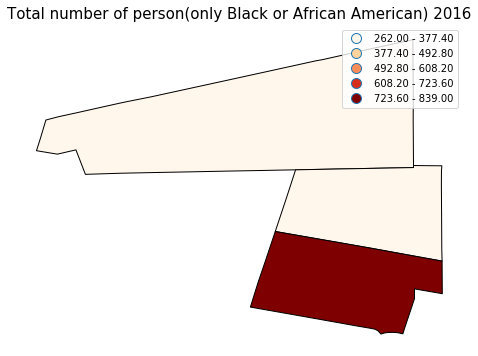

In [5]:

elicott = elicott.merge(elicott_data_to_float,on = ['Tract','Block'])
titles = elicott.filter(like = 'Total').columns
fig, ax = plt.subplots(figsize=(8,8))
ax.set_axis_off()
ax.set_title(titles[1] +  " 2016", fontsize = 15)
#ud = User_Defined(elicott[titles[1]], bins)

#plot_dataframe(s = elicott, column = titles[6], fig = fig, ax = ax, binning = ud, cmap = 'Reds')

elicott.plot(column = titles[1], ax = ax, legend = True
            , cmap='OrRd', scheme = 'equal_interval', edgecolor = "black")
fig.savefig('images/' + titles[1] + ' 2016.png')
elicott[titles[1]].min()

### Each map plotted will be placed onto the images folder 

In [7]:
for title in titles: 
    ax.set_title(title +  " 2016", fontsize = 15)
    elicott.plot(column = title, ax = ax, legend = True, cmap='OrRd', scheme = 'equal_interval'
            , edgecolor = "black")
    fig.savefig('images/' + title + ' 2016.png')

<Figure size 432x288 with 0 Axes>